<a href="https://colab.research.google.com/github/Pierre-Portfolio/GenerateBannerLogo/blob/main/GenerateBanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Pillow requests

In [2]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont
import random

✅ Wallpaper Haute Densité généré : tech_wallpaper_x4_density.png


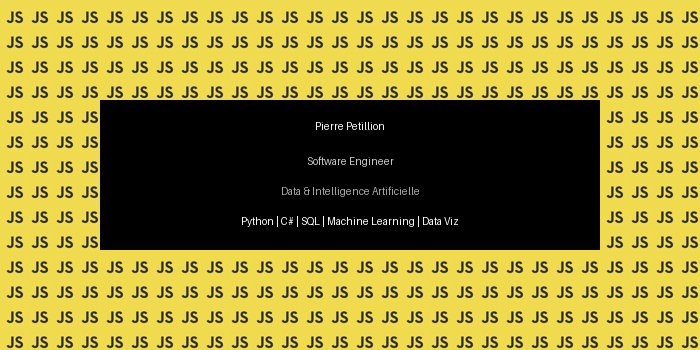

In [13]:
# Configuration de la session
session = requests.Session()
session.headers.update({
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
})

def download_image(url):
    try:
        response = session.get(url, timeout=10)
        response.raise_for_status()
        return Image.open(BytesIO(response.content)).convert("RGBA")
    except Exception as e:
        return Image.new('RGBA', (100, 100), (20, 20, 20, 255))

def create_tech_wallpaper(tools_data, rows=14, cols=28, box_size=25, gap=0, output_filename="tech_wallpaper_x4_density.png"):
    """
    Version Haute Densité : 4x plus d'images (28x14 cases), case de 25px.
    L'image finale garde la même dimension (700x350).
    """

    # Calculs de taille
    img_width = cols * box_size
    img_height = rows * box_size

    final_image = Image.new('RGB', (img_width, img_height), color=(0, 0, 0))
    draw = ImageDraw.Draw(final_image)

    # --- DÉFINITION DE LA ZONE CENTRALE ---
    # On double les dimensions de la zone vide pour garder la même taille physique en pixels
    void_cols = 20 # 10 * 2 (Largeur = 500px)
    void_rows = 6  # 3 * 2 (Hauteur = 150px)

    # Centrage automatique (Zone centrale de même taille physique qu'avant)
    start_row = (rows - void_rows) // 2
    end_row = start_row + void_rows

    start_col = (cols - void_cols) // 2
    end_col = start_col + void_cols

    # --- POLICES (Tailles inchangées car la zone texte fait la même taille physique) ---
    try:
        name_font = ImageFont.truetype("arial.ttf", 45)
        title_font = ImageFont.truetype("arial.ttf", 22)
        sub_font = ImageFont.truetype("arial.ttf", 14)
        skills_font = ImageFont.truetype("arial.ttf", 14)
    except IOError:
        name_font = title_font = sub_font = skills_font = ImageFont.load_default()

    # --- GÉNÉRATION DE LA GRILLE ---
    for i in range(rows * cols):
        item = random.choice(tools_data)
        url = item['content']

        col = i % cols
        row = i // cols

        if start_col <= col < end_col and start_row <= row < end_row:
            continue

        x_offset = col * box_size
        y_offset = row * box_size

        # --- ICÔNES MINUSCULES (25x25) ---
        img = download_image(url)
        img.thumbnail((box_size, box_size))
        icon_x = x_offset + (box_size - img.width) // 2
        icon_y = y_offset + (box_size - img.height) // 2
        final_image.paste(img, (icon_x, icon_y), img)

    # --- TEXTE CENTRAL ---

    text_zone_center_y = (start_row * box_size) + (void_rows * box_size) // 2
    center_x = img_width // 2

    # 1. Nom
    name_text = "Pierre Petillion"
    bbox_name = draw.textbbox((0, 0), name_text, font=name_font)
    name_w = bbox_name[2] - bbox_name[0]
    draw.text((center_x - name_w // 2, text_zone_center_y - 55), name_text, fill="white", font=name_font)

    # 2. Titre
    title_text = "Software Engineer"
    bbox_title = draw.textbbox((0, 0), title_text, font=title_font)
    title_w = bbox_title[2] - bbox_title[0]
    draw.text((center_x - title_w // 2, text_zone_center_y - 20), title_text, fill="#CCCCCC", font=title_font)

    # 3. Sous-titre
    sub_text = "Data & Intelligence Artificielle"
    bbox_sub = draw.textbbox((0, 0), sub_text, font=sub_font)
    sub_w = bbox_sub[2] - bbox_sub[0]
    draw.text((center_x - sub_w // 2, text_zone_center_y + 10), sub_text, fill="#AAAAAA", font=sub_font)

    # 4. Compétences
    skills_text = "Python | C# | SQL | Machine Learning | Data Viz"
    bbox_skills = draw.textbbox((0, 0), skills_text, font=skills_font)
    skills_w = bbox_skills[2] - bbox_skills[0]
    draw.text((center_x - skills_w // 2, text_zone_center_y + 40), skills_text, fill="white", font=skills_font)

    final_image.save(output_filename)
    print(f"✅ Wallpaper Haute Densité généré : {output_filename}")

    # Affichage
    try:
        final_image.show()
    except:
        pass
    try:
        from IPython.display import display
        display(final_image)
    except:
        pass

    return final_image

# --- LISTE FOURNIE ---
test_data = [
    {"key": "Python", "content": "https://upload.wikimedia.org/wikipedia/commons/6/6a/JavaScript-logo.png"},
    {"key": "Java", "content": "https://upload.wikimedia.org/wikipedia/commons/6/6a/JavaScript-logo.png"},
    {"key": "JS", "content": "https://upload.wikimedia.org/wikipedia/commons/6/6a/JavaScript-logo.png"},
    {"key": "Git", "content": "https://upload.wikimedia.org/wikipedia/commons/6/6a/JavaScript-logo.png"},
    {"key": "Docker", "content": "https://upload.wikimedia.org/wikipedia/commons/6/6a/JavaScript-logo.png"},
    {"key": "React", "content": "https://upload.wikimedia.org/wikipedia/commons/6/6a/JavaScript-logo.png"},
    {"key": "Node", "content": "https://upload.wikimedia.org/wikipedia/commons/6/6a/JavaScript-logo.png"},
    {"key": "Linux", "content": "https://upload.wikimedia.org/wikipedia/commons/6/6a/JavaScript-logo.png"}
]

# Exécution
if __name__ == "__main__":
    create_tech_wallpaper(test_data)